**Mount Drive & Import Libraries**

In [11]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# Load dataset (update path if needed)
file_path = "/content/drive/MyDrive/datasetnws/Telco-Customer-Churn/train.csv"
df = pd.read_csv(file_path)

# Check first rows
df.head()


,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn Category,Churn Reason,Churn Score,City,CLTV,Contract,Country,...,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Under 30,Unlimited Data,Zip Code,Churn
0,72,4,19.44,NaN,NaN,51,San Mateo,4849,Two Year,United States,...,25,2191.15,0,486.00,0.0,2677.15,0,1,94403,0
1,27,59,45.62,NaN,NaN,27,Sutter Creek,3715,Month-to-Month,United States,...,35,3418.20,0,1596.70,0.0,5014.90,1,1,95685,0
2,59,0,16.07,NaN,NaN,59,Santa Cruz,5092,Month-to-Month,United States,...,46,851.20,0,739.22,0.0,1590.42,0,0,95064,0
3,25,27,0.00,NaN,NaN,49,Brea,2068,One Year,United States,...,27,1246.40,30,0.00,0.0,1276.40,1,0,92823,0
4,31,21,17.22,Dissatisfaction,Network reliability,88,San Jose,4026,One Year,United States,...,58,3563.80,0,998.76,0.0,4562.56,0,1,95117,1


**Data Overview**

In [13]:
# Shape of dataset
print("Rows:", df.shape[0], " | Columns:", df.shape[1])

# Info & missing values
df.info()
df.isnull().sum()

# Churn rate
df['Churn'].value_counts(normalize=True) * 100


Rows: 4225  | Columns: 52
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4225 entries, 0 to 4224
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4225 non-null   int64  
 1   Avg Monthly GB Download            4225 non-null   int64  
 2   Avg Monthly Long Distance Charges  4225 non-null   float64
 3   Churn Category                     1121 non-null   object 
 4   Churn Reason                       1121 non-null   object 
 5   Churn Score                        4225 non-null   int64  
 6   City                               4225 non-null   object 
 7   CLTV                               4225 non-null   int64  
 8   Contract                           4225 non-null   object 
 9   Country                            4225 non-null   object 
 10  Customer ID                        4225 non-null   object 
 11  Customer Status               

,proportion
Churn,
0,73.467456
1,26.532544


In [24]:
# ----- DATA CLEANING -----

# 1. Check missing values
print("Missing values per column:\n", df.isnull().sum())

# 2. Handle missing values in 'Churn Category', 'Churn Reason', 'Offer', 'Internet Type'
#    -> Fill NaN with "Unknown"
for col in ['Churn Category','Churn Reason','Offer','Internet Type']:
    df[col] = df[col].fillna("Unknown")

# 3. Convert categorical columns with Yes/No to integers (if needed)
# Example: Paperless Billing (Yes=1, No=0)
df['Paperless Billing'] = df['Paperless Billing'].map({'Yes':1,'No':0})

# 4. Ensure numeric columns are correct
numeric_cols = ['Total Charges','Monthly Charge','Total Revenue']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Fill any numeric NaN with median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# 5. Drop duplicates (if any)
df = df.drop_duplicates()

# Final check
print("Dataset shape after cleaning:", df.shape)
df.head()


Missing values per column:
 Age                                     0
Avg Monthly GB Download                 0
Avg Monthly Long Distance Charges       0
Churn Category                       3104
Churn Reason                         3104
Churn Score                             0
City                                    0
CLTV                                    0
Contract                                0
Country                                 0
Customer ID                             0
Customer Status                         0
Dependents                              0
Device Protection Plan                  0
Gender                                  0
Internet Service                        0
Internet Type                         886
Lat Long                                0
Latitude                                0
Longitude                               0
Married                                 0
Monthly Charge                          0
Multiple Lines                          0
Number

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn Category,Churn Reason,Churn Score,City,CLTV,Contract,Country,...,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Under 30,Unlimited Data,Zip Code,Churn
0,72,4,19.44,Unknown,Unknown,51,San Mateo,4849,Two Year,United States,...,25,2191.15,0,486.00,0.0,2677.15,0,1,94403,0
1,27,59,45.62,Unknown,Unknown,27,Sutter Creek,3715,Month-to-Month,United States,...,35,3418.20,0,1596.70,0.0,5014.90,1,1,95685,0
2,59,0,16.07,Unknown,Unknown,59,Santa Cruz,5092,Month-to-Month,United States,...,46,851.20,0,739.22,0.0,1590.42,0,0,95064,0
3,25,27,0.00,Unknown,Unknown,49,Brea,2068,One Year,United States,...,27,1246.40,30,0.00,0.0,1276.40,1,0,92823,0
4,31,21,17.22,Dissatisfaction,Network reliability,88,San Jose,4026,One Year,United States,...,58,3563.80,0,998.76,0.0,4562.56,0,1,95117,1


**Basic Churn Distribution**

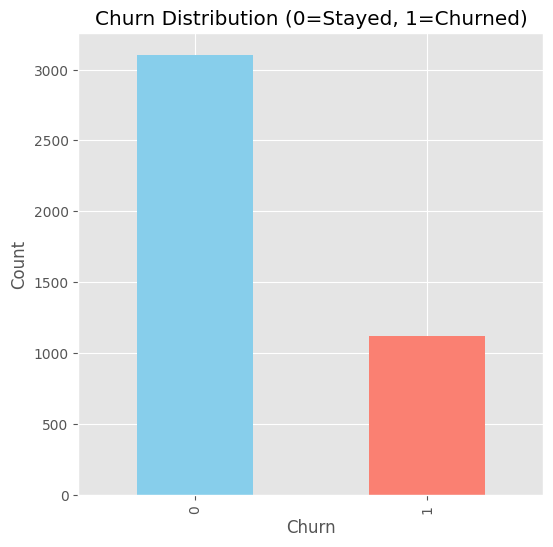

In [25]:
plt.figure(figsize=(6,6))
df['Churn'].value_counts().plot(
    kind='bar',
    color=['skyblue','salmon']
)
plt.title("Churn Distribution (0=Stayed, 1=Churned)")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()


**Churn by Contract Type**

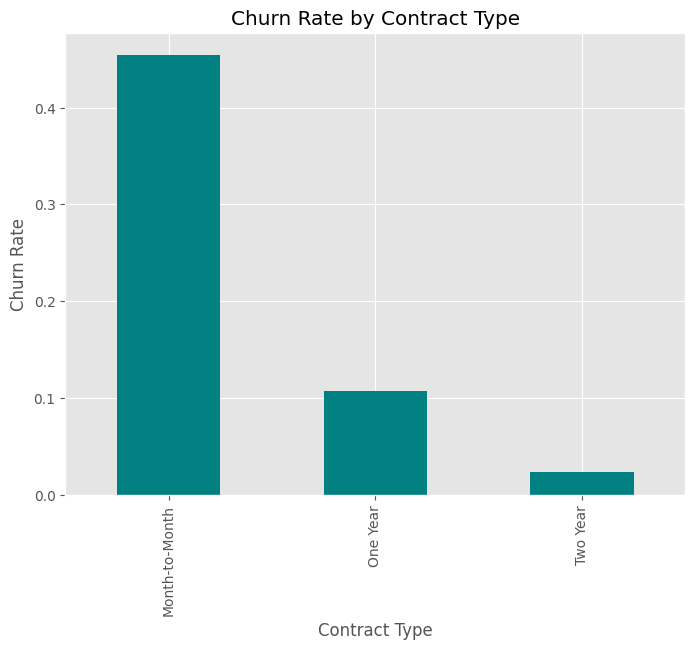

In [15]:
contract_churn = df.groupby("Contract")['Churn'].mean()

plt.figure(figsize=(8,6))
contract_churn.plot(kind='bar', color="teal")
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate")
plt.xlabel("Contract Type")
plt.show()


**Tenure vs Churn**

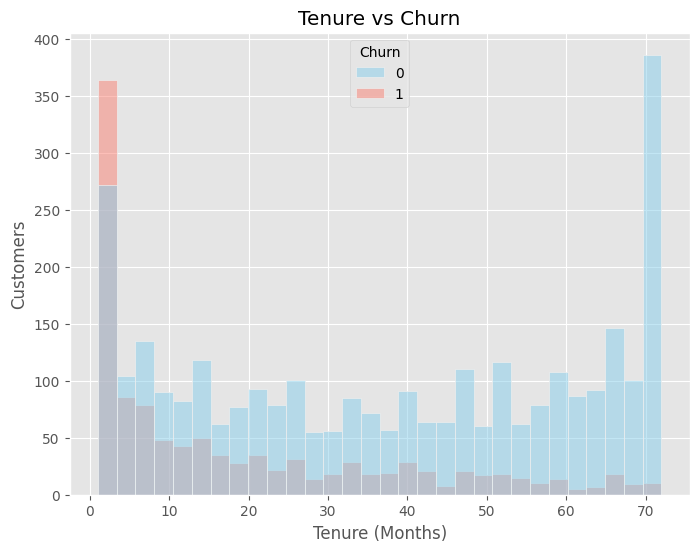

In [16]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x="Tenure in Months", hue="Churn", bins=30, kde=False, palette=["skyblue","salmon"])
plt.title("Tenure vs Churn")
plt.xlabel("Tenure (Months)")
plt.ylabel("Customers")
plt.show()


**Monthly Charges vs Churn**

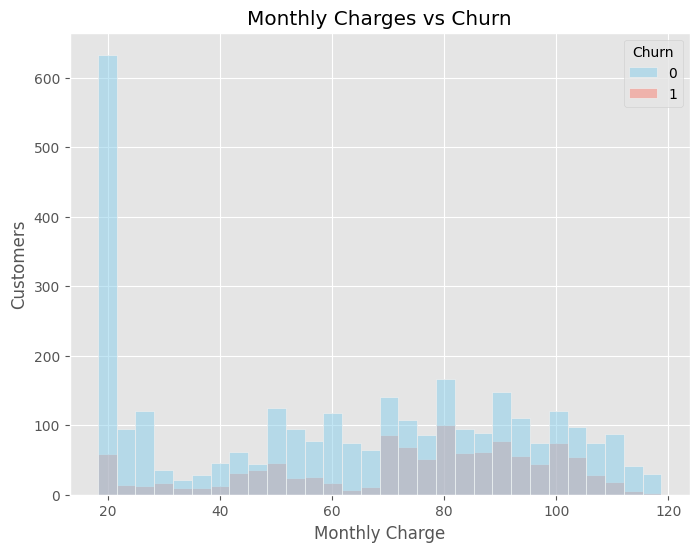

In [17]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x="Monthly Charge", hue="Churn", bins=30, kde=False, palette=["skyblue","salmon"])
plt.title("Monthly Charges vs Churn")
plt.xlabel("Monthly Charge")
plt.ylabel("Customers")
plt.show()


**Cross Analysis**

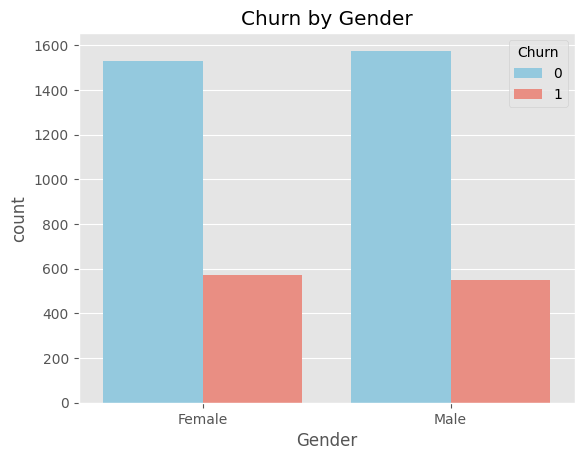

In [18]:
sns.countplot(data=df, x="Gender", hue="Churn", palette=["skyblue","salmon"])
plt.title("Churn by Gender")
plt.show()


In [ ]:
#Internet Type

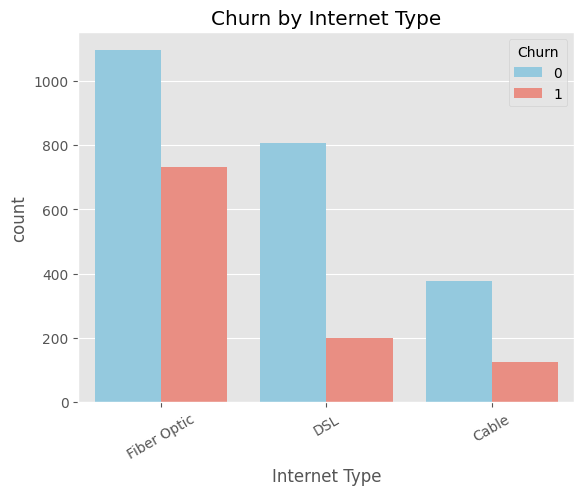

In [19]:
sns.countplot(data=df, x="Internet Type", hue="Churn", palette=["skyblue","salmon"])
plt.title("Churn by Internet Type")
plt.xticks(rotation=30)
plt.show()


**Payment Method**

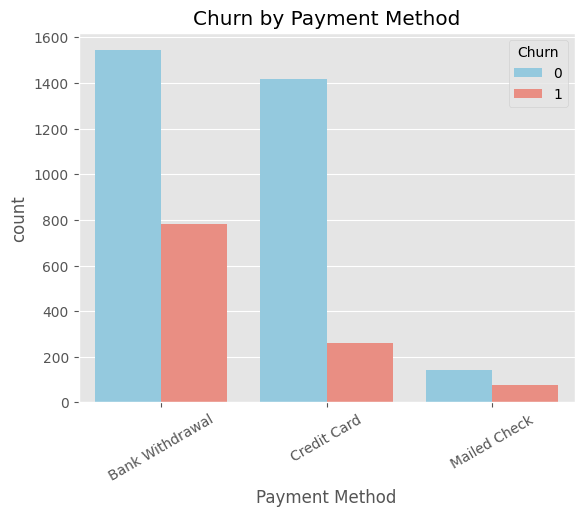

In [20]:
sns.countplot(data=df, x="Payment Method", hue="Churn", palette=["skyblue","salmon"])
plt.title("Churn by Payment Method")
plt.xticks(rotation=30)
plt.show()


**Senior Citizens**

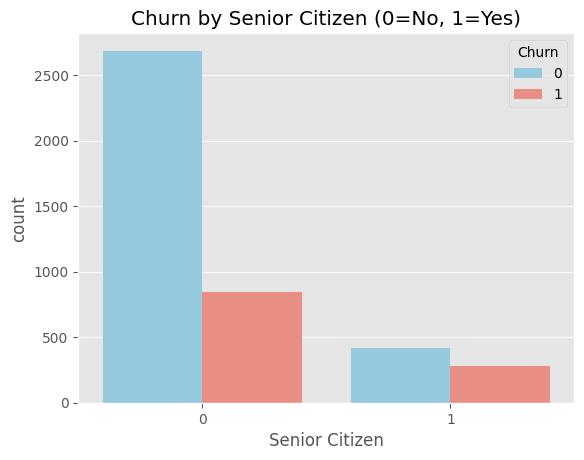

In [21]:
sns.countplot(data=df, x="Senior Citizen", hue="Churn", palette=["skyblue","salmon"])
plt.title("Churn by Senior Citizen (0=No, 1=Yes)")
plt.show()


**Paperless Billing**

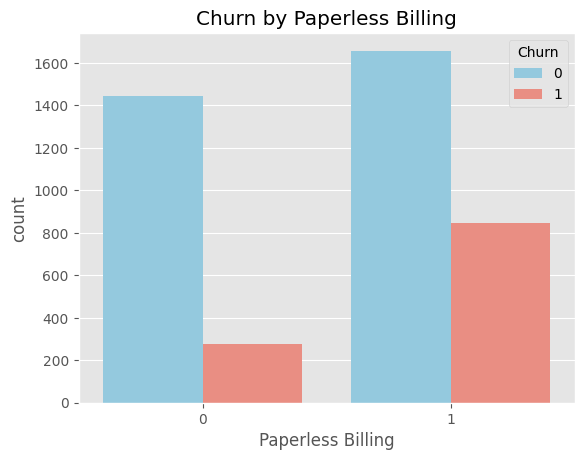

In [22]:
sns.countplot(data=df, x="Paperless Billing", hue="Churn", palette=["skyblue","salmon"])
plt.title("Churn by Paperless Billing")
plt.show()


**Correlation Heatmap**

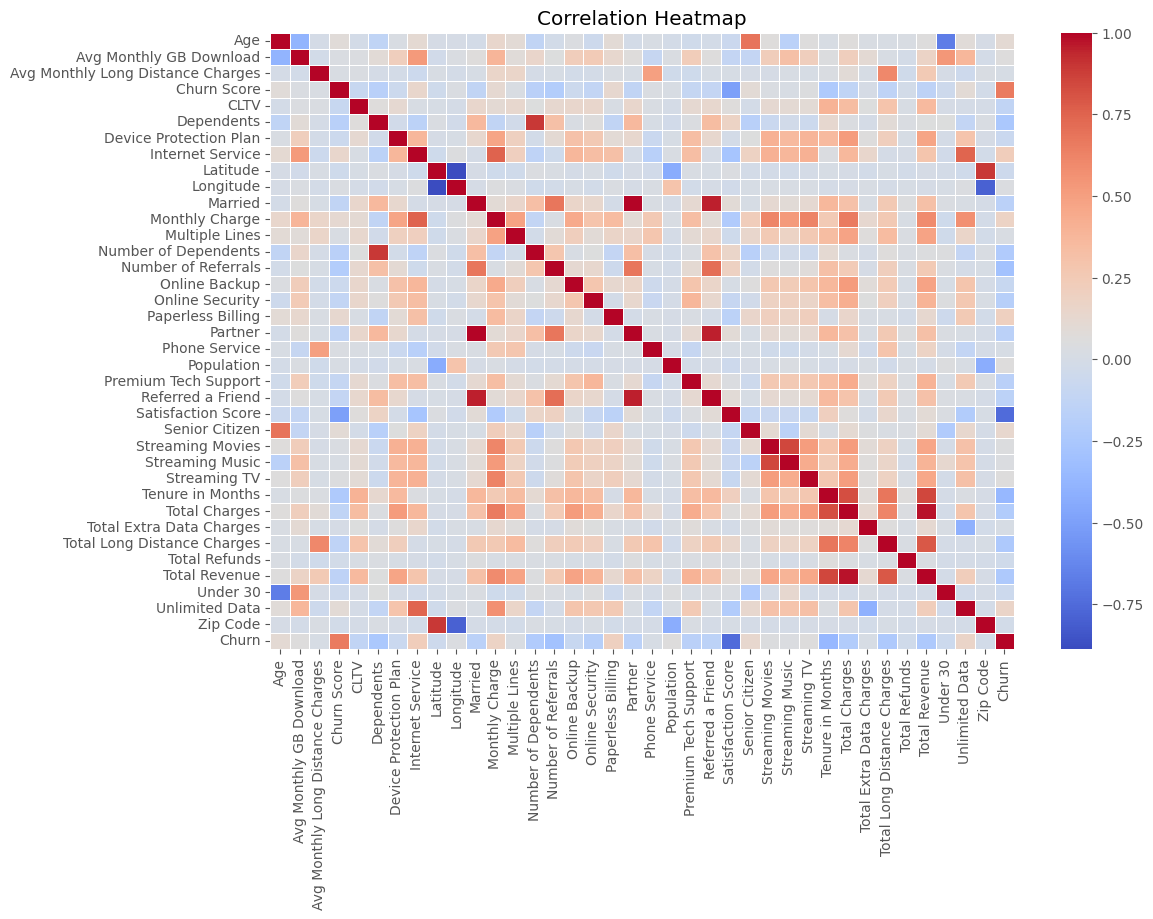

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


###  Key Insights from Churn Analysis

1. **Overall Churn Rate**: ~26.5% (about 1 in 4 customers leave).  
2. **Contract Type**: Month-to-Month contracts have the highest churn.  
3. **Tenure**: Customers within first year are most likely to churn. Long-tenured customers are loyal.  
4. **Monthly Charges**: Higher monthly charges strongly linked to churn.  
5. **Internet Type**: Fiber optic customers churn more than DSL.  
6. **Payment Method**: Electronic check users churn more than auto-pay/credit card users.  
7. **Paperless Billing**: More churn compared to paper billing.  
8. **Senior Citizens**: Slightly higher churn rate.  
9. **Streaming Services**: Streaming TV & movie users churn more.  

📌 **Conclusion**: Customer drop-off is led by short contracts, high monthly charges, and billing/payment methods. Retention can be improved with loyalty programs, discounts for long-term contracts, and better engagement with at-risk segments.
